<a href="https://colab.research.google.com/github/karanpk02/Membership-Functions-Simulation/blob/main/membership_function_and_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

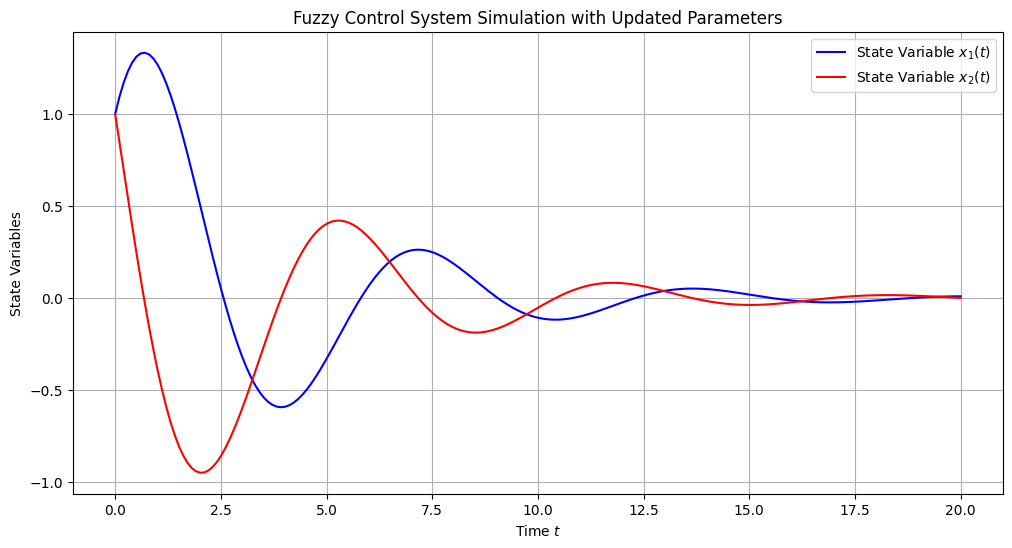

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define membership functions with different parameters
def S1(mu):
    return np.exp(-((mu - 12)**2) / (2 * 3**2))  # Changed center and width

def S2(mu):
    return np.exp(-((mu - 18)**2) / (2 * 3**2))  # Changed center and width

def fuzzy_basis(mu):
    omega1 = S1(mu)
    omega2 = S2(mu)
    total = omega1 + omega2
    h1 = omega1 / total if total != 0 else 0  # Avoid division by zero
    h2 = omega2 / total if total != 0 else 0  # Avoid division by zero
    return h1, h2

# System matrices for each fuzzy rule with different dynamics
def system_matrices(mu):
    h1, h2 = fuzzy_basis(mu)
    A1 = np.array([[0, 1], [-1, -0.3]])  # Modified dynamics
    A2 = np.array([[0, 1], [-1, -0.7]])  # Modified dynamics
    A = h1 * A1 + h2 * A2
    return A

# Define the system dynamics
def system_dynamics(x, t):
    mu = 15  # Constant input for simplicity
    A = system_matrices(mu)
    dxdt = np.dot(A, x)
    return dxdt

# Initial conditions
x0 = [1, 1]  # Changed initial conditions

# Time points
t = np.linspace(0, 20, 200)  # Increased time range and resolution

# Solve ODE
x = odeint(system_dynamics, x0, t)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(t, x[:, 0], label='State Variable $x_1(t)$', color='b')
plt.plot(t, x[:, 1], label='State Variable $x_2(t)$', color='r')
plt.xlabel('Time $t$')
plt.ylabel('State Variables')
plt.legend()
plt.title('Fuzzy Control System Simulation with Updated Parameters')
plt.grid(True)
plt.show()


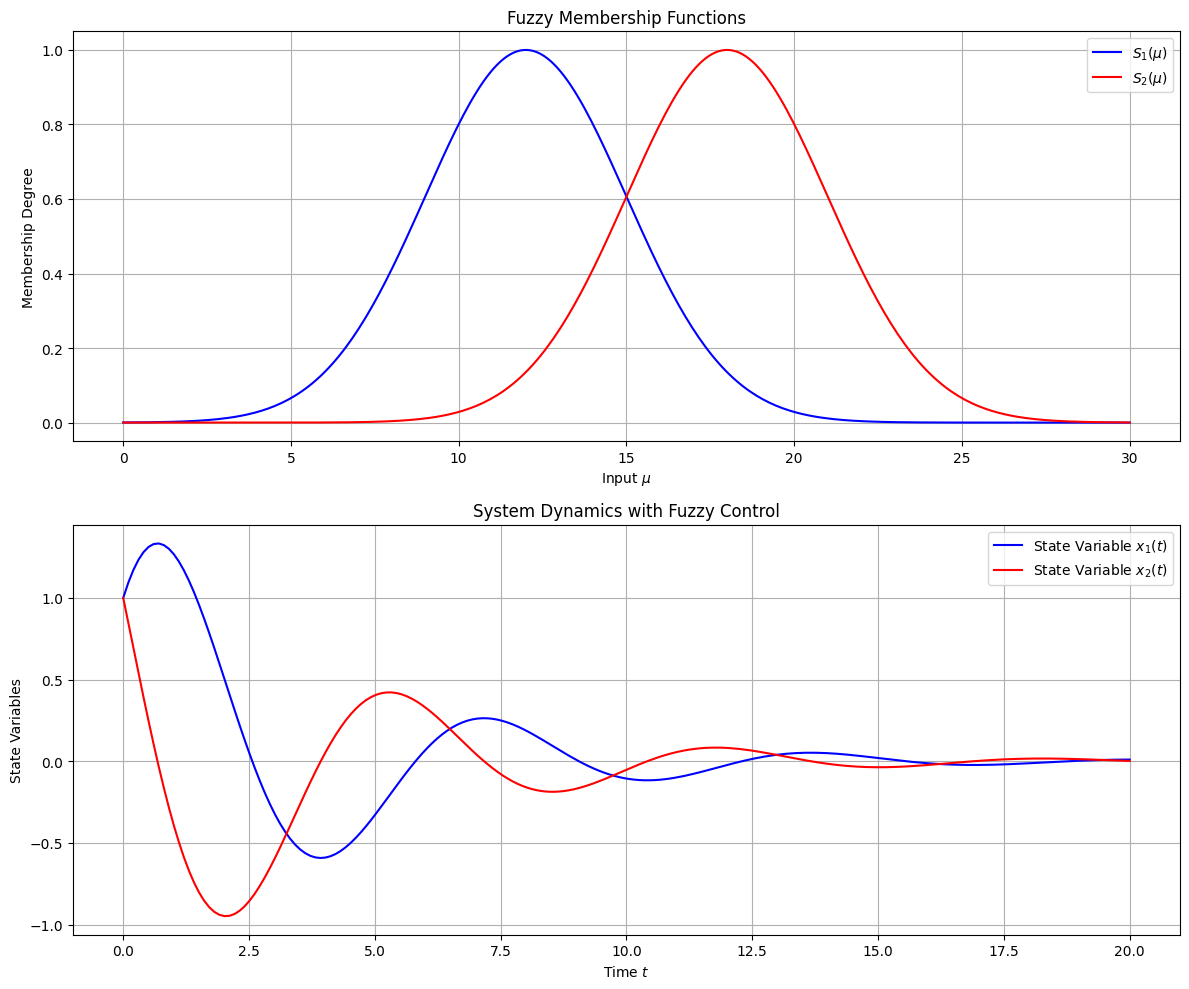

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define membership functions with different parameters
def S1(mu):
    return np.exp(-((mu - 12)**2) / (2 * 3**2))  # Center at 12, width 3

def S2(mu):
    return np.exp(-((mu - 18)**2) / (2 * 3**2))  # Center at 18, width 3

def fuzzy_basis(mu):
    omega1 = S1(mu)
    omega2 = S2(mu)
    total = omega1 + omega2
    h1 = omega1 / total if total != 0 else 0  # Avoid division by zero
    h2 = omega2 / total if total != 0 else 0  # Avoid division by zero
    return h1, h2

# System matrices for each fuzzy rule with different dynamics
def system_matrices(mu):
    h1, h2 = fuzzy_basis(mu)
    A1 = np.array([[0, 1], [-1, -0.3]])  # Dynamics for fuzzy set 1
    A2 = np.array([[0, 1], [-1, -0.7]])  # Dynamics for fuzzy set 2
    A = h1 * A1 + h2 * A2
    return A

# Define the system dynamics
def system_dynamics(x, t):
    mu = 15  # Constant input for simplicity
    A = system_matrices(mu)
    dxdt = np.dot(A, x)
    return dxdt

# Initial conditions
x0 = [1, 1]  # Initial state

# Time points
t = np.linspace(0, 20, 200)  # Time range

# Solve ODE
x = odeint(system_dynamics, x0, t)

# Plot membership functions
mu_values = np.linspace(0, 30, 300)
S1_values = S1(mu_values)
S2_values = S2(mu_values)

plt.figure(figsize=(12, 10))

# Plot membership functions
plt.subplot(2, 1, 1)
plt.plot(mu_values, S1_values, label='$S_1(\mu)$', color='b')
plt.plot(mu_values, S2_values, label='$S_2(\mu)$', color='r')
plt.xlabel('Input $\mu$')
plt.ylabel('Membership Degree')
plt.legend()
plt.title('Fuzzy Membership Functions')
plt.grid(True)

# Plot state variables
plt.subplot(2, 1, 2)
plt.plot(t, x[:, 0], label='State Variable $x_1(t)$', color='b')
plt.plot(t, x[:, 1], label='State Variable $x_2(t)$', color='r')
plt.xlabel('Time $t$')
plt.ylabel('State Variables')
plt.legend()
plt.title('System Dynamics with Fuzzy Control')
plt.grid(True)

plt.tight_layout()
plt.show()


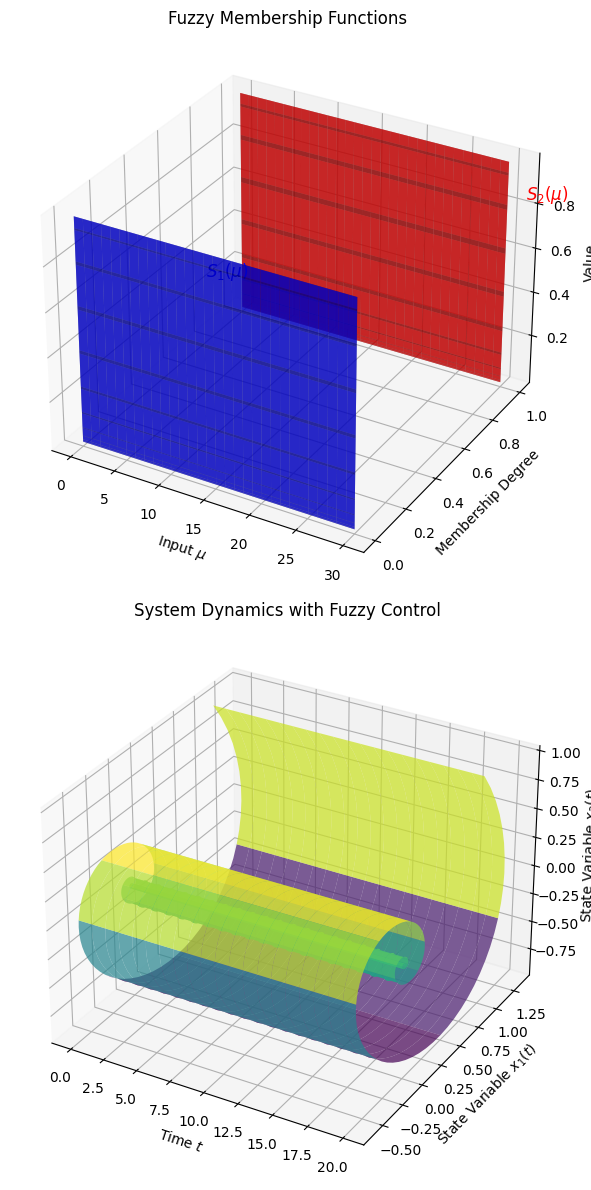

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint

# Define membership functions
def S1(mu):
    return np.exp(-((mu - 12)**2) / (2 * 3**2))  # Center at 12, width 3

def S2(mu):
    return np.exp(-((mu - 18)**2) / (2 * 3**2))  # Center at 18, width 3

def fuzzy_basis(mu):
    omega1 = S1(mu)
    omega2 = S2(mu)
    total = omega1 + omega2
    h1 = omega1 / total if total != 0 else 0  # Avoid division by zero
    h2 = omega2 / total if total != 0 else 0  # Avoid division by zero
    return h1, h2

# System matrices for each fuzzy rule
def system_matrices(mu):
    h1, h2 = fuzzy_basis(mu)
    A1 = np.array([[0, 1], [-1, -0.3]])  # Dynamics for fuzzy set 1
    A2 = np.array([[0, 1], [-1, -0.7]])  # Dynamics for fuzzy set 2
    A = h1 * A1 + h2 * A2
    return A

# Define the system dynamics
def system_dynamics(x, t):
    mu = 15  # Constant input for simplicity
    A = system_matrices(mu)
    dxdt = np.dot(A, x)
    return dxdt

# Initial conditions
x0 = [1, 1]  # Initial state

# Time points
t = np.linspace(0, 20, 200)  # Time range

# Solve ODE
x = odeint(system_dynamics, x0, t)

# Create 3D plots
fig = plt.figure(figsize=(14, 12))

# Plot fuzzy membership functions in 3D
ax1 = fig.add_subplot(211, projection='3d')
mu_values = np.linspace(0, 30, 300)
S1_values = S1(mu_values)
S2_values = S2(mu_values)

# Create a meshgrid for 3D plot
MU, S1_MU = np.meshgrid(mu_values, S1_values)
MU, S2_MU = np.meshgrid(mu_values, S2_values)

# Plot membership functions
ax1.plot_surface(MU, np.zeros_like(MU), S1_MU, rstride=10, cstride=10, color='b', alpha=0.6)
ax1.plot_surface(MU, np.ones_like(MU), S2_MU, rstride=10, cstride=10, color='r', alpha=0.6)
ax1.set_xlabel('Input $\mu$')
ax1.set_ylabel('Membership Degree')
ax1.set_zlabel('Value')
ax1.set_title('Fuzzy Membership Functions')
ax1.text(5, 0.5, 0.5, '$S_1(\mu)$', color='b', fontsize=12)
ax1.text(25, 1.5, 0.5, '$S_2(\mu)$', color='r', fontsize=12)

# Plot state variables in 3D
ax2 = fig.add_subplot(212, projection='3d')
T, X1 = np.meshgrid(t, x[:, 0])
T, X2 = np.meshgrid(t, x[:, 1])

# Plot state variables
ax2.plot_surface(T, X1, X2, rstride=10, cstride=10, cmap='viridis', alpha=0.7)
ax2.set_xlabel('Time $t$')
ax2.set_ylabel('State Variable $x_1(t)$')
ax2.set_zlabel('State Variable $x_2(t)$')
ax2.set_title('System Dynamics with Fuzzy Control')

plt.tight_layout()
plt.show()
